In [1]:
import tensorflow as tf

# bash /Applications/Python*/Install\ Certificates.command

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# escalar los datos entre 0 y 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'] )
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2704 - accuracy: 0.9207
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1093 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9763


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9715
0.09077818691730499 0.9714999794960022


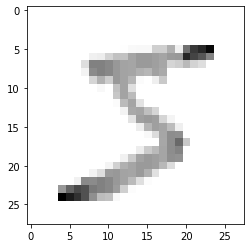

In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap= plt.cm.binary)
plt.show()
#print(x_train[0])




In [4]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [6]:
prediction = new_model.predict([x_test])

In [7]:
print(prediction)

[[3.9387967e-08 1.2250415e-07 7.2608377e-06 ... 9.9998009e-01
  1.3843530e-07 1.3278982e-07]
 [5.0489251e-07 2.0641917e-03 9.9776912e-01 ... 6.1909326e-08
  1.7201202e-05 3.3506198e-10]
 [4.7579638e-07 9.9982965e-01 8.0712816e-06 ... 3.5765905e-05
  5.8127091e-05 3.4769664e-07]
 ...
 [5.4172494e-10 5.8409847e-07 7.0197075e-08 ... 7.6595388e-05
  6.5782780e-07 7.7172655e-05]
 [3.7902199e-05 1.7885171e-06 1.6731521e-07 ... 6.6858238e-06
  5.1795053e-03 3.4704922e-08]
 [3.2832788e-06 3.8982087e-08 7.6720397e-07 ... 2.9909333e-10
  1.0511316e-08 5.7162657e-09]]


In [8]:
import numpy as np

d = 30
print(np.argmax(prediction[d]))

3


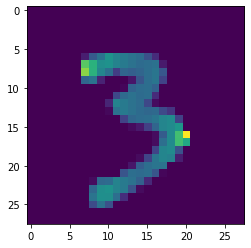

In [9]:
plt.imshow(x_test[d])
plt.show()